### Exploratory Data Analysis of the Ames Housing Dataset
This Jupyter Notebook focuses on the Exploratory Data Analysis (EDA) of the Ames Housing dataset. The objective is to understand the structure, patterns, peculiarities, and relationships within this data - particularly with regards to the diverse array of property features and their corresponding market prices.

EDA is a critical step in any data analysis or data science project. It involves a thorough examination of the dataset to discover patterns, spot anomalies, test hypotheses, and to check assumptions with the help of summary statistics and graphical representations.

#### Import the neccesary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)


In [3]:
data = pd.read_csv('train.csv')

data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
d = data.isnull().sum()
d[d!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

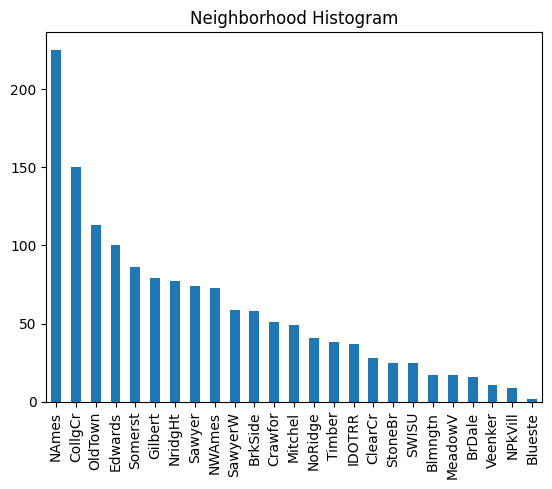

In [20]:
ax = data['Neighborhood'].astype('category').value_counts().plot(kind='bar', title='Neighborhood Histogram')


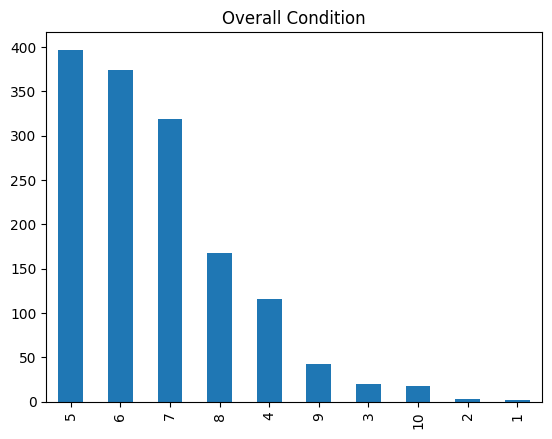

In [25]:
ax = data['OverallQual'].value_counts().plot(kind='bar', title='Overall Condition')

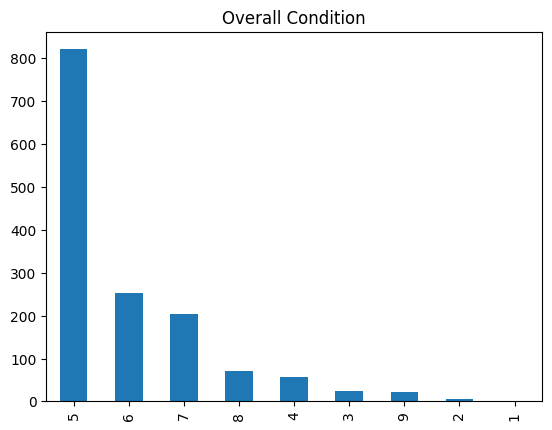

In [24]:
ax = data['OverallCond'].value_counts().plot(kind='bar', title='Overall Condition')

In [ ]:
sns.pairplot(data.select_dtypes(include="number"));

#### Correlation between numeric features

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    data.select_dtypes(include="number").corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

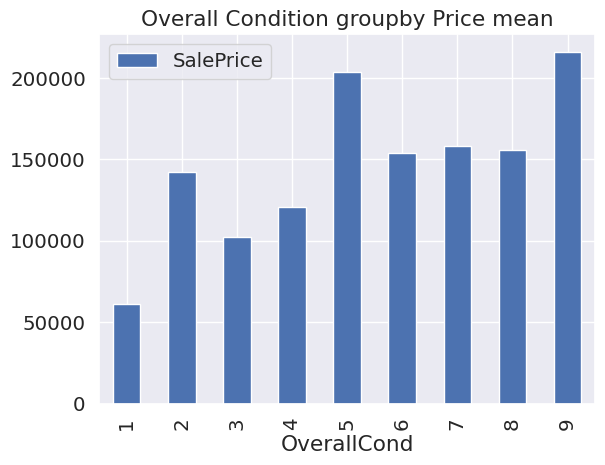

In [31]:
ax = data.loc[:, ['OverallCond', 'SalePrice']].groupby('OverallCond') \
    .mean().plot(kind='bar', title='Overall Condition groupby Price mean')
    

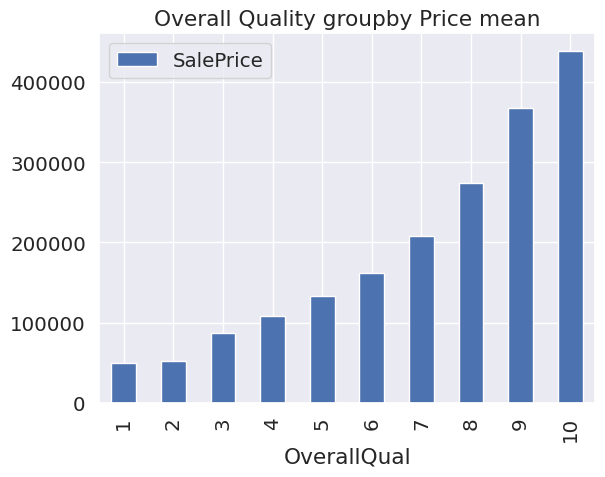

In [32]:
ax = data.loc[:, ['OverallQual', 'SalePrice']].groupby('OverallQual') \
    .mean().plot(kind='bar', title='Overall Quality groupby Price mean')
    

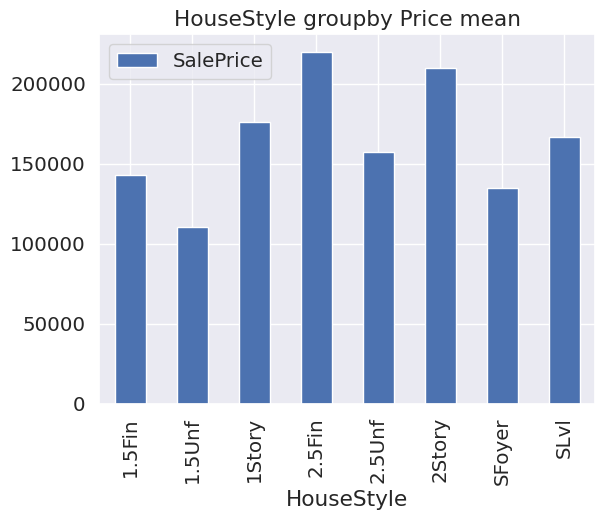

In [34]:
ax = data.loc[:, ['HouseStyle', 'SalePrice']].groupby('HouseStyle') \
    .mean().plot(kind='bar', title='HouseStyle groupby Price mean')

#### Ames Houses Cost

/tmp/ipykernel_3346/3953367708.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], hist=True, kde=False,


Text(0, 0.5, 'Houses')

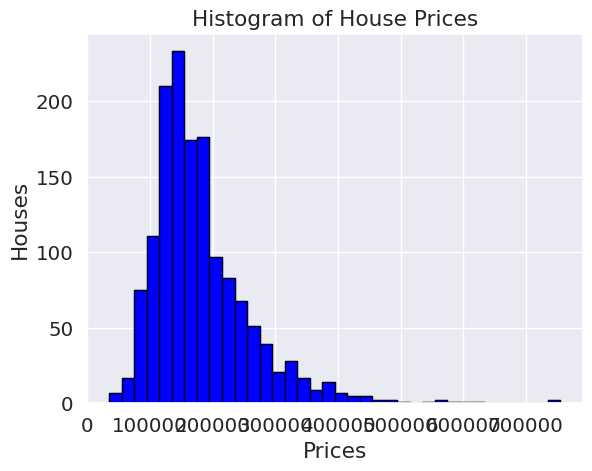

In [36]:
# matplotlib histogram
plt.hist(data['SalePrice'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(data['SalePrice'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of House Prices')
plt.xlabel('Prices')
plt.ylabel('Houses')